In [1]:
#Import Libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the bank statements CSV file
df = pd.read_csv("bankstatements.csv")
pd.set_option("display.max_rows" , 509)
print("Dataset Overview")
print(f"Shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
print(f"\n Data types \n{df.dtypes}")
print(f"\nFirst 5 rows:")
df.head()

Dataset Overview
Shape: (509, 10)

Columns: ['date', 'DrCr', 'amount', 'balance', 'mode', 'name', 'Day', 'Month', 'Year', 'Tday']

 Data types 
date        object
DrCr        object
amount     float64
balance    float64
mode        object
name        object
Day          int64
Month        int64
Year         int64
Tday         int64
dtype: object

First 5 rows:


,date,DrCr,amount,balance,mode,name,Day,Month,Year,Tday
0,2022-01-01,Db,10000.0,473292.87,ATM,NaN,1,1,2022,1
1,2022-01-01,Db,10000.0,463292.87,ATM,NaN,1,1,2022,1
2,2022-01-02,Db,930.0,462362.87,UPI,AYUBRAJE,2,1,2022,2
3,2022-01-07,Db,2000.0,460362.87,UPI,ABUTALAH,7,1,2022,3
4,2022-01-10,Db,1000.0,459362.87,UPI,AGRAWALB,10,1,2022,4


In [3]:
# Basic Data Exploration
print("Data Exploration")
print(f"Date Range : {df['date'].min()} to {df["date"].max()}\n")
print(f"Total Transactions: {len(df)}\n")
print(df["DrCr"].value_counts(),"\n")
print(f"\nTransaction Modes:")
print(df["mode"].value_counts(), "\n")
print(f"\nMissing Data Values:")
print(df.isnull().sum())

Data Exploration
Date Range : 2022-01-01 to 2023-10-07

Total Transactions: 509

DrCr
Db    373
Cr    136
Name: count, dtype: int64 


Transaction Modes:
mode
UPI                     370
ATM                      49
NEFT                     37
ECS                      22
SBINT                     7
SMS CHARGES               7
CHEQUE                    5
IMPS                      4
DEBIT CARD ANNUAL         2
STOCK CHRG                2
FUNDS TRANSFER DEBIT      2
UNKNOWN                   1
OTHER                     1
Name: count, dtype: int64 


Missing Data Values:
date         0
DrCr         0
amount       0
balance      0
mode         0
name       139
Day          0
Month        0
Year         0
Tday         0
dtype: int64


In [4]:
#Data Cleaning
df["date"] = pd.to_datetime(df["date"])

# Create signed amounts (positive for income, negative for expenses)
df["signed_amount"] = np.where(df['DrCr'] == 'Cr', df['amount'], -df['amount'])

# Create transaction type
df['transaction_type'] = np.where(df['DrCr'] == 'Cr', 'Income', 'Expense')

#Time
df["month_year"] = df['date'].dt.to_period('M')
df["month_name"] = df["date"].dt.month_name()
df["weekday"] = df['date'].dt.day_name()

In [5]:
def categorize_transaction(row):
    mode = str(row['mode'].lower())
    name = str(row['name']).lower() if pd.notna(row['name']) else ''
    if row['DrCr'] == 'Cr':
        if 'neft' in mode:
            return 'Salary/Income'
        elif 'ecs' in mode:
            return "Interest/Returns"
        elif 'upi' in mode:
            return "UPI Income"
        else:
            return 'Other Income'
    else:
        if 'atm' in mode:
            return 'Cash Withdrawal'
        elif 'upi' in mode:
            return 'Digital Payments'
        elif 'neft' in mode:
            return 'Bank Transfers'
        elif 'ecs' in mode:
            return 'Bills/Subscriptions'
        elif 'debit card' in mode:
            return 'Card Payments'
        elif any(word in mode for word in ["charges", "chrg", "fee"]):  # Added missing colon here
            return 'Bank Charges'
        elif 'cheque' in mode:
            return 'Cheque Payments'
        else:
            return 'Other Expenses'

df["category"] = df.apply(categorize_transaction, axis=1)
print(f"Categories created: {df['category'].nunique()}")
df['category'].value_counts()

Categories created: 11


category
Digital Payments       308
UPI Income              62
Cash Withdrawal         47
Salary/Income           37
Interest/Returns        21
Other Income            16
Bank Charges             9
Cheque Payments          4
Card Payments            2
Other Expenses           2
Bills/Subscriptions      1
Name: count, dtype: int64

In [6]:
df["name"] = df["name"].fillna("Unknown")
df

,date,DrCr,amount,balance,mode,name,Day,Month,Year,Tday,signed_amount,transaction_type,month_year,month_name,weekday,category
0,2022-01-01,Db,10000.00,473292.87,ATM,Unknown,1,1,2022,1,-10000.00,Expense,2022-01,January,Saturday,Cash Withdrawal
1,2022-01-01,Db,10000.00,463292.87,ATM,Unknown,1,1,2022,1,-10000.00,Expense,2022-01,January,Saturday,Cash Withdrawal
2,2022-01-02,Db,930.00,462362.87,UPI,AYUBRAJE,2,1,2022,2,-930.00,Expense,2022-01,January,Sunday,Digital Payments
3,2022-01-07,Db,2000.00,460362.87,UPI,ABUTALAH,7,1,2022,3,-2000.00,Expense,2022-01,January,Friday,Digital Payments
4,2022-01-10,Db,1000.00,459362.87,UPI,AGRAWALB,10,1,2022,4,-1000.00,Expense,2022-01,January,Monday,Digital Payments
5,2022-01-10,Db,1800.00,457562.87,UPI,GOASELEC,10,1,2022,4,-1800.00,Expense,2022-01,January,Monday,Digital Payments
6,2022-01-10,Db,5000.00,452562.87,UPI,GOASELEC,10,1,2022,4,-5000.00,Expense,2022-01,January,Monday,Digital Payments
7,2022-01-10,Db,3000.00,449562.87,UPI,AGRAWALB,10,1,2022,4,-3000.00,Expense,2022-01,January,Monday,Digital Payments
8,2022-01-10,Cr,2400.00,451962.87,NEFT,Unknown,10,1,2022,4,2400.00,Income,2022-01,January,Monday,Salary/Income
9,2022-01-12,Cr,1.00,451963.87,UPI,NAFEESAB,12,1,2022,5,1.00,Income,2022-01,January,Wednesday,UPI Income


In [7]:
print("="*50)
print("FINANCIAL SUMMARY STATISTICS")
print("="*50)

FINANCIAL SUMMARY STATISTICS


In [8]:
total_income = df[df["DrCr"] == 'Cr']['amount'].sum()
total_expenses = df[df["DrCr"] == 'Db']['amount'].sum()
net_savings = total_income - total_expenses
savings_rate = (net_savings/total_income)*100 if total_income > 0 else 0


print(f"Total Income: {total_income:,.2f}")
print(f"Total Expenses: {total_expenses:,.2f}")
print(f"Net Savings: {net_savings:,.2f}")
print(f"Savings Rate: {savings_rate:.1f}%")


Total Income: 2,029,258.59
Total Expenses: 2,417,595.99
Net Savings: -388,337.40
Savings Rate: -19.1%


In [9]:
print("="*50)
print("TRANSACTION SUMMARY STATISTICS")
print("="*50)

TRANSACTION SUMMARY STATISTICS


In [10]:
print(f"\n Total Transaction {len(df)}")
print(f"Average Transaction Size {df["amount"].mean():,.2f}\n")
print(f"Median Transaction Size {df["amount"].median():,.2f}\n")
print(f"Largest Transaction {df["amount"].max():,.2f}\n")
print(f"Smallest Transaction {df["amount"].min():,.2f}\n")


 Total Transaction 509
Average Transaction Size 8,736.45

Median Transaction Size 1,120.00

Largest Transaction 360,000.00

Smallest Transaction 1.00



In [11]:
num_months = df["month_year"].nunique()
print(f"Monthly Average {num_months} \n")
print(f"Average Monthly Income {total_income/num_months:.2f}\n")
print(f"Average Monthly Expenses {total_expenses/num_months:.2f}\n")
print(f"Average Monthly Savings {savings_rate/num_months:.2f}\n")

Monthly Average 22 

Average Monthly Income 92239.03

Average Monthly Expenses 109890.73

Average Monthly Savings -0.87



In [12]:
monthly_summary = df.groupby('month_year').agg({
    'signed_amount': 'sum',
    'amount': ['count', 'mean']
}).round(2)
monthly_summary.columns = ['net_amount', 'transaction_count', 'avg_transaction']
monthly_summary

,net_amount,transaction_count,avg_transaction
month_year,,,
2022-01,-37175.91,20,2439.60
2022-02,-32307.00,20,7438.15
2022-03,-183526.00,25,12853.20
2022-04,-130764.00,16,18973.00
2022-05,11217.09,20,6698.25
2022-06,43116.09,21,8663.24
2022-07,-142605.00,17,16319.35
2022-08,368807.09,27,17999.37
2022-09,-286645.50,25,21046.50


In [13]:
income_monthly = df[df['DrCr'] == 'Cr'].groupby("month_year")['amount'].sum()
expense_monthly = df[df['DrCr'] == 'Db'].groupby("month_year")['amount'].sum()
monthly_summary['income'] = income_monthly.fillna(0)
monthly_summary['expenses'] = expense_monthly.fillna(0)
monthly_summary['savings_rate'] = ((monthly_summary['income'] - monthly_summary['expenses']) / monthly_summary['income'] * 100).round(1)

print("Monthly Summary:")
monthly_summary


Monthly Summary:


,net_amount,transaction_count,avg_transaction,income,expenses,savings_rate
month_year,,,,,,
2022-01,-37175.91,20,2439.60,5808.09,42984.00,-640.1
2022-02,-32307.00,20,7438.15,58228.00,90535.00,-55.5
2022-03,-183526.00,25,12853.20,68902.00,252428.00,-266.4
2022-04,-130764.00,16,18973.00,86402.00,217166.00,-151.3
2022-05,11217.09,20,6698.25,72591.09,61374.00,15.5
2022-06,43116.09,21,8663.24,112522.09,69406.00,38.3
2022-07,-142605.00,17,16319.35,67412.00,210017.00,-211.5
2022-08,368807.09,27,17999.37,427395.09,58588.00,86.3
2022-09,-286645.50,25,21046.50,119758.51,406404.01,-239.4


In [14]:
print("Spending by Category:")
category_summary = df.groupby('category').agg({
    'amount': ['sum', 'count', 'mean'],
    'signed_amount': 'sum'
}).round(2)

category_summary.columns = ['total_amount', 'transaction_count', 'avg_amount', 'net_amount']
category_summary = category_summary.sort_values('total_amount', ascending=False)

print(category_summary)

Spending by Category:
                     total_amount  transaction_count  avg_amount  net_amount
category                                                                    
Salary/Income          1179664.16                 37    31882.82  1179664.16
Digital Payments       1149254.99                308     3731.35 -1149254.99
Cheque Payments         860000.00                  4   215000.00  -860000.00
Other Income            477847.00                 16    29865.44   477847.00
Cash Withdrawal         374059.00                 47     7958.70  -374059.00
UPI Income              370923.92                 62     5982.64   370923.92
Other Expenses           33591.00                  2    16795.50   -33591.00
Interest/Returns           823.51                 21       39.21      823.51
Card Payments              290.00                  2      145.00     -290.00
Bank Charges               224.00                  9       24.89     -224.00
Bills/Subscriptions        177.00                  1  

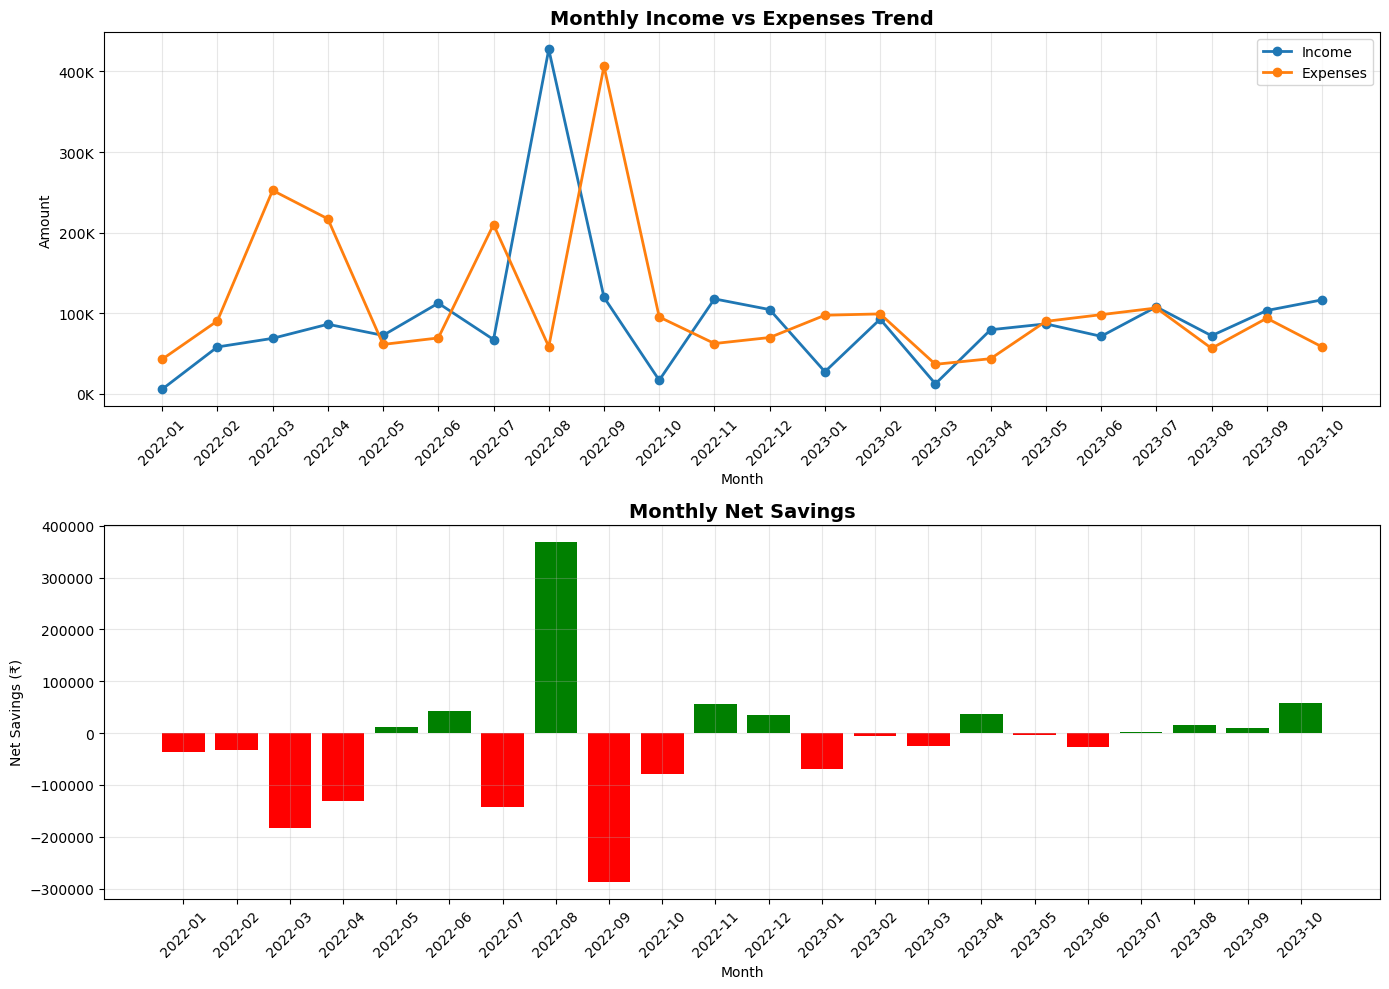

In [15]:
#Visualization

#Monthly Income
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(14,10))
# Monthly income vs expenses line chart
months = monthly_summary.index.astype(str) 
income = monthly_summary['income']
expenses = monthly_summary['expenses']
net = monthly_summary['net_amount']

ax1.plot(months, income, marker='o', linewidth=2, label='Income')
ax1.plot(months, expenses, marker='o', linewidth=2, label='Expenses')
ax1.set_title('Monthly Income vs Expenses Trend', fontsize=14, fontweight='bold')
ax1.set_xlabel('Month')
ax1.set_ylabel('Amount')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1000:.0f}K'))
ax1.tick_params(axis='x', rotation=45)

# Monthly net savings bar chart
colors = ['green' if x > 0 else 'red' for x in net]
ax2.bar(months, net, color=colors)
ax2.set_title('Monthly Net Savings', fontsize=14, fontweight='bold')
ax2.set_xlabel('Month')
ax2.set_ylabel('Net Savings (₹)')
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>